## EDA by Daniel Owolabi

### Lets Import the necessery Liberaries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('e-finance dataset.csv')
df.head()

,Authors,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,Page end,...,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Access Type,Source,EID
0,"Beni E.H., Lagaisse B., Joosen W., Aly A., Bra...",57189258279;8933999000;22834655700;55841871100...,Datablinder: A distributed data protection mid...,2019,Middleware Industry 2019 - Proceedings of the ...,NaN,NaN,NaN,50,57.0,...,9781450370417,NaN,NaN,English,Middlew. Ind. - Proc. Int. Middlew. Conf. Ind....,Conference Paper,Final,Open Access,Scopus,2-s2.0-85078939286
1,"Xiong H., Zhou Y.",57212174318;57212168803;,Construction and Application of Ocean Shipping...,2019,Journal of Coastal Research,97,sp1,NaN,29,34.0,...,NaN,JCRSE,NaN,English,J. Coast. Res.,Article,Final,NaN,Scopus,2-s2.0-85076117139
2,"Feng L., Zhang H., Tsai W.-T., Sun S.",57194783804;56979549200;57050382000;57197771738;,System architecture for high-performance permi...,2019,Frontiers of Computer Science,13,6,NaN,1151,1165.0,...,NaN,NaN,NaN,English,Front. Comput. Sci.,Article,Final,NaN,Scopus,2-s2.0-85051801026
3,"Rožkalne Z., Mukāns M., Vētra A.",57211844555;56074676500;6506045608;,Transition-age young adults with cerebral pals...,2019,Medicina (Lithuania),55,11,737,NaN,NaN,...,NaN,NaN,31739609.0,English,Medicina,Article,Final,Open Access,Scopus,2-s2.0-85075115419
4,"Alshubiri F., Jamil S.A., Elheddad M.",56539905200;56770916900;57195032630;,The impact of ICT on financial development: Em...,2019,International Journal of Engineering Business ...,11,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,English,Intern. J. Eng. Bus. Manage.,Article,Final,Open Access,Scopus,2-s2.0-85071721834


In [3]:
df.shape

(228, 46)

In [6]:
df.describe(include="all")

,Authors,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,Page end,...,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Access Type,Source,EID
count,228,228,228,228.000000,227,180,147,27,206,199.000000,...,66,27,4.000000e+00,228,218,228,228,16,228,228
unique,210,209,224,NaN,146,75,23,27,165,NaN,...,64,23,NaN,4,142,7,1,1,1,228
top,Martin P.L.,57188559538;,E-Finance,NaN,International Journal of Electronic Finance,5,1,737,1,NaN,...,9780620471725,FACME,NaN,English,Int. J. Electron. Finance,Article,Final,Open Access,Scopus,2-s2.0-85078939286
freq,6,6,4,NaN,54,20,34,1,11,NaN,...,2,3,NaN,223,48,139,228,16,228,1
mean,NaN,NaN,NaN,2010.214912,NaN,NaN,NaN,NaN,NaN,723.462312,...,NaN,NaN,2.013451e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,6.172437,NaN,NaN,NaN,NaN,NaN,5156.031031,...,NaN,NaN,9.310620e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,1981.000000,NaN,NaN,NaN,NaN,NaN,3.000000,...,NaN,NaN,1.030222e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,2007.000000,NaN,NaN,NaN,NaN,NaN,100.500000,...,NaN,NaN,1.424886e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN,206.000000,...,NaN,NaN,1.924810e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,2014.000000,NaN,NaN,NaN,NaN,NaN,416.000000,...,NaN,NaN,2.513375e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### From the count row, we can see that the toal number of observation is 228, and the year range is from 1981 to 2019.

In [7]:
#The Percentage of missing values in the dataset

null_percenatges = (df.isnull().sum()/df.shape[0])*100
null_percenatges

Authors                            0.000000
Author(s) ID                       0.000000
Title                              0.000000
Year                               0.000000
Source title                       0.438596
Volume                            21.052632
Issue                             35.526316
Art. No.                          88.157895
Page start                         9.649123
Page end                          12.719298
Page count                        98.245614
Cited by                          32.894737
DOI                               23.684211
Link                               0.000000
Affiliations                       6.140351
Authors with affiliations          0.877193
Abstract                           0.000000
Author Keywords                   21.052632
Index Keywords                    55.701754
Molecular Sequence Numbers       100.000000
Chemicals/CAS                    100.000000
Tradenames                       100.000000
Manufacturers                   

#### We will have to drop the columns with null values above 60%.  

In [8]:
df= df.dropna(thresh=df.shape[0]*0.6, how='all', axis=1)

In [9]:
#Check the dataset again

df.isnull().sum()

Authors                           0
Author(s) ID                      0
Title                             0
Year                              0
Source title                      1
Volume                           48
Issue                            81
Page start                       22
Page end                         29
Cited by                         75
DOI                              54
Link                              0
Affiliations                     14
Authors with affiliations         2
Abstract                          0
Author Keywords                  48
References                       16
Correspondence Address           37
Publisher                        88
ISSN                             54
Language of Original Document     0
Abbreviated Source Title         10
Document Type                     0
Publication Stage                 0
Source                            0
EID                               0
dtype: int64

#### From the above count values, we have dropped Columns with empty entries above 60%

In [10]:
df['Language of Original Document'].unique()

array(['English', 'Polish', 'Chinese', 'German'], dtype=object)

In [11]:
language_count=df.groupby('Language of Original Document')['Language of Original Document'].count()
language_count

Language of Original Document
Chinese      2
English    223
German       2
Polish       1
Name: Language of Original Document, dtype: int64

#### From the above array, we can see that the Jornals are from four languages. English,Polish,Chinese,German. The most is English

In [14]:
df["Year"].unique()

array([2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009,
       2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 1988, 1986, 1984,
       1981], dtype=int64)

We can get all the available years in a list by getting the unique values in the year column

In [17]:
years = sorted(list(df["Year"].unique()))
years

[1981,
 1984,
 1986,
 1988,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019]

We can also get the distribution of the dataset in the number of journals we have per year

In [27]:
year_count = df["Year"].value_counts().sort_index()
year_count

1981     2
1984     1
1986     1
1988     1
2001     5
2002     8
2003     4
2004     7
2005    10
2006    15
2007    13
2008     9
2009     4
2010    19
2011    35
2012    19
2013    13
2014     9
2015    11
2016     7
2017    11
2018     9
2019    15
Name: Year, dtype: int64

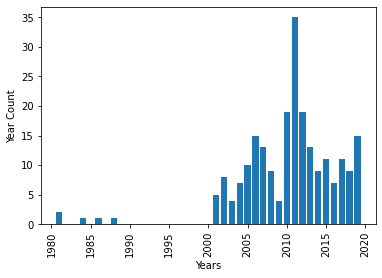

In [28]:
plt.bar(years,year_count)
plt.xticks(rotation=90)
plt.ylabel('Year Count')
plt.xlabel('Years')
plt.show()

#### From the above plot, we can see the most jornals are dated 2011 from the dataset.

In [29]:
#Converting the values in the author and author ID columns into lists
df["Authors"] = df["Authors"].map(lambda x: x.split(","))
df["Author(s) ID"] = df["Author(s) ID"].map(lambda x: x.split(";"))

In [30]:
#Creating a new column in the df that combines the authors with their id in a tuple
df["Authors_withID"] = None
for i in range(df.shape[0]):
    df["Authors_withID"][i] = list(zip(df["Authors"][i], df["Author(s) ID"][i]))

C:\apps\anaconda3\envs\py3.0-TF2.0\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [32]:
df["Authors_withID"][0]

[('Beni E.H.', '57189258279'),
 (' Lagaisse B.', '8933999000'),
 (' Joosen W.', '22834655700'),
 (' Aly A.', '55841871100'),
 (' Brackx M.', '55387606200')]

In [33]:
authors_dict = {}
for row in df["Authors"]:
    for author in row:
        if author in authors_dict:
            authors_dict[author] += 1
        else:
            authors_dict[author] = 1

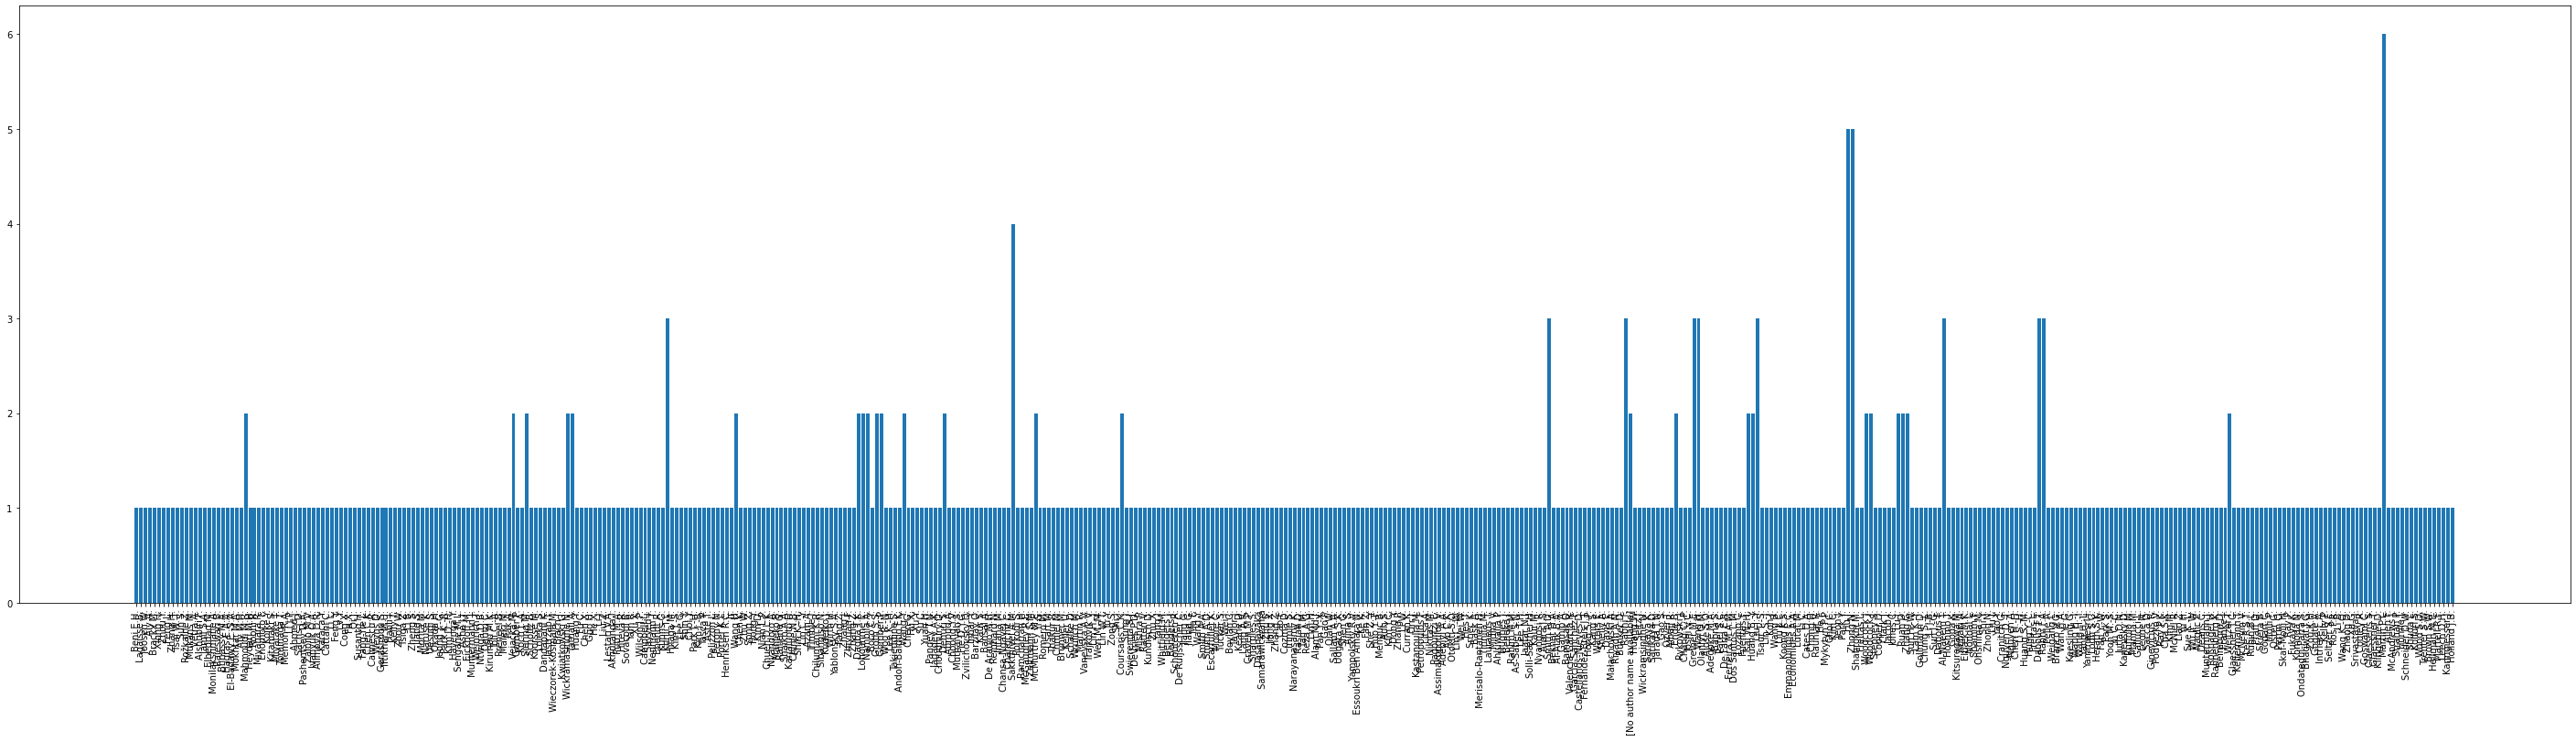

In [47]:
y_values = list(authors_dict.values())
authors = list(authors_dict.keys())
plt.figure(figsize=(50, 12))
plt.bar(range(len(authors_dict)), y_values, tick_label=authors)
plt.xticks(rotation=90)
plt.show()

The plot above is messy because we have about 511 unique authors and we can see that the highest number of journals by a single author is 6